In [8]:

from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [9]:
TRAIN_DIR = r'images/images/test'
TEST_DIR = r'images/images/train'

In [10]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [11]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(train)

                                     image     label
0       images/images/test\angry\10052.jpg     angry
1       images/images/test\angry\10065.jpg     angry
2       images/images/test\angry\10079.jpg     angry
3       images/images/test\angry\10095.jpg     angry
4       images/images/test\angry\10121.jpg     angry
...                                    ...       ...
7061  images/images/test\surprise\9806.jpg  surprise
7062  images/images/test\surprise\9830.jpg  surprise
7063  images/images/test\surprise\9853.jpg  surprise
7064  images/images/test\surprise\9878.jpg  surprise
7065   images/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [13]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [14]:
print(test)
print(test['image'])#this line is not needed

                                       image     label
0            images/images/train\angry\0.jpg     angry
1            images/images/train\angry\1.jpg     angry
2           images/images/train\angry\10.jpg     angry
3        images/images/train\angry\10002.jpg     angry
4        images/images/train\angry\10016.jpg     angry
...                                      ...       ...
28816  images/images/train\surprise\9969.jpg  surprise
28817  images/images/train\surprise\9985.jpg  surprise
28818  images/images/train\surprise\9990.jpg  surprise
28819  images/images/train\surprise\9992.jpg  surprise
28820  images/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]
0              images/images/train\angry\0.jpg
1              images/images/train\angry\1.jpg
2             images/images/train\angry\10.jpg
3          images/images/train\angry\10002.jpg
4          images/images/train\angry\10016.jpg
                         ...                  
28816    images/images/train\sur

In [15]:
from tqdm.notebook import tqdm

In [16]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images): #extracting features from group of images
    features = []
    for image in tqdm(images):
        # Load the image in grayscale mode
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # Reshape the features to match the input shape (48, 48, 1)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [17]:
test_features = extract_features(test['image'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [04:05<00:00, 117.60it/s]


In [18]:
train_features = extract_features(train['image'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:54<00:00, 128.89it/s]


In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [22]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [23]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D
model = Sequential()


# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Print model summary (optional)
model.summary()

C:\Users\rajch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8189 - loss: 0.5271 - val_accuracy: 0.5245 - val_loss: 1.4936
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.8198 - loss: 0.5022 - val_accuracy: 0.5282 - val_loss: 1.5201
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8303 - loss: 0.4878 - val_accuracy: 0.5219 - val_loss: 1.5008
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8276 - loss: 0.5005 - val_accuracy: 0.5261 - val_loss: 1.5430
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.8399 - loss: 0.4479 - val_accuracy: 0.5307 - val_loss: 1.5482
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.8432 - loss: 0.4531 - val_accuracy: 0.5314 - val_loss: 1.4970
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8438 - loss: 0.4533 - val_accuracy: 0.5283 - val_loss: 1.5460
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8349 - loss: 0.4664 - val_accuracy: 0.5318 -

In [30]:
from keras.models import Sequential

In [31]:
model_json = model.to_json()
with open('emotiondetector.json','w') as json_file:
    json_file.write(model_json)
model.save('emotiondetector.h5')

In [32]:
from keras.models import model_from_json

In [51]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [52]:
def ef (image):  #extracting features from a single image
    img = load_img(img , grayscale = True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [53]:
def ef(image):  # extracting features from a single image
    img = load_img(image, color_mode='grayscale')  # Corrected variable name
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0  # Normalize the image


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Model prediction is sad


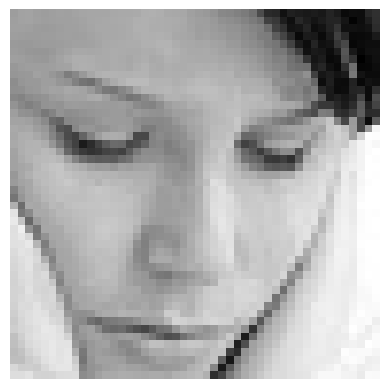

In [48]:
import matplotlib.pyplot as plt  # Ensure this is imported

image = 'images/images/train/sad/42.jpg'
print("Original image is of sad")  # Corrected label
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.axis("off")  # Hide axes for better visualization
plt.show()


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is angry


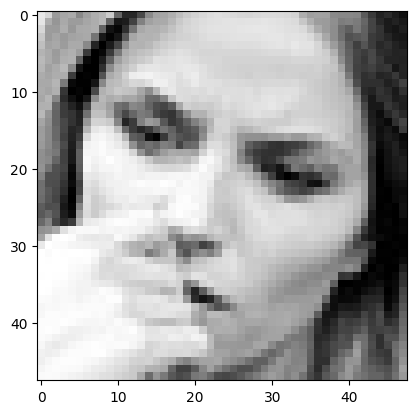

In [50]:
image = 'images/images/train/fear/2.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
model prediction is sad


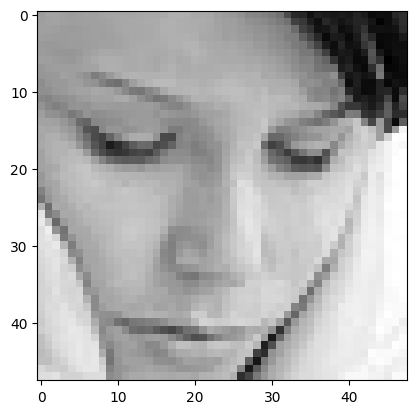

In [55]:
image = 'images/images/train/sad/42.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
model prediction is happy


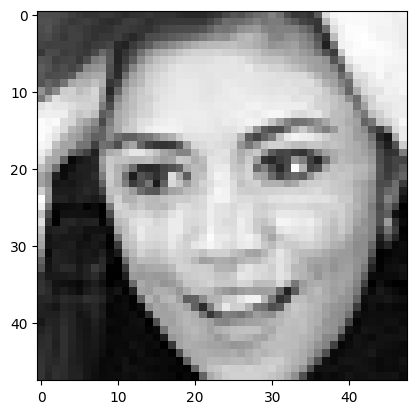

In [58]:
image = 'images/images/train/surprise/39.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')